Research Questions 
Which industry sectors have produced the top earning individuals?
Who are the wealthiest people in the world and in the United States?
What is the correlation between age and annual income?

Methods
This project utilizes Python's Pandas library for importing, cleaning and analyzing CSV data.
The data is imported into SQL database for analysis. 
The results are visually represented using Seaborn.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from pathlib import Path
import re
import sqlite3
import warnings
warnings.filterwarnings('ignore')

In [27]:
my_dataset = pd.read_csv('../billionaire_list_20yrs.csv', encoding='unicode_escape')

In [28]:
my_dataset.isna().sum()

Unnamed: 0                    0
name                          0
last_name                 10850
age                           0
gender                    11892
time                          0
permanent_country         47691
company                   25500
main_industry                 0
wealth_source_details     10922
industry                     49
state                    193179
headquarters             218714
countries                     0
annual_income                 0
daily_income                  0
birth_year                    0
name_cleaned                  0
dtype: int64

Original dataset contains many rows with missing data. It is important to backfill the data for more accurate analysis. 
Irrelevant columns can be dropped.

In [4]:
del my_dataset['Unnamed: 0']
del my_dataset['headquarters']
del my_dataset['daily_income']

In [5]:
my_dataset['last_name'] = my_dataset['last_name'].fillna('Unknown')
my_dataset['gender'] = my_dataset['gender'].fillna('Unknown')
my_dataset['permanent_country'] = my_dataset['permanent_country'].fillna('Unknown')
my_dataset['company'] = my_dataset['company'].fillna('Unknown')
my_dataset['state'] = my_dataset['state'].fillna('Unknown')
my_dataset['wealth_source_details'] = my_dataset['wealth_source_details'].fillna('Unknown')
my_dataset['industry'] = my_dataset['industry'].fillna('Unknown')

In [6]:
my_dataset.isna().sum()

name                     0
last_name                0
age                      0
gender                   0
time                     0
permanent_country        0
company                  0
main_industry            0
wealth_source_details    0
industry                 0
state                    0
countries                0
annual_income            0
birth_year               0
name_cleaned             0
dtype: int64

In [7]:
my_dataset.dtypes

name                     object
last_name                object
age                       int64
gender                   object
time                      int64
permanent_country        object
company                  object
main_industry            object
wealth_source_details    object
industry                 object
state                    object
countries                object
annual_income             int64
birth_year                int64
name_cleaned             object
dtype: object

The Path library from Python allows me to create a SQL Lite database that I can connect to with Pandas' 'to_sql' method.

In [8]:
Path('billionaire_list.db').touch()
my_conn = sqlite3.connect('billionaire_list.db')
my_c = my_conn.cursor()

In [9]:
my_dataset.to_sql('billionaire_list', my_conn, if_exists='replace', index=False)

In [11]:
my_dataset_lst = pd.read_sql(''' SELECT distinct t1.* FROM billionaire_list t1 
INNER JOIN ( SELECT name, MAX(time) AS max_time FROM billionaire_list GROUP BY name ) t2 
ON t1.name = t2.name AND t1.time = t2.max_time; ''', my_conn)
my_dataset_lst

,name,last_name,age,gender,time,permanent_country,company,main_industry,wealth_source_details,industry,state,countries,annual_income,birth_year,name_cleaned
0,Abdulla bin Ahmad Al Ghurair,Al Ghurair,67,M,2022,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,Unknown,are,67080000,1955,abdulla_bin_ahmad_al_ghurair
1,Adam Kwok Kai-fai,Unknown,39,Unknown,2022,China-Hong Kong,Sun Hung Kai,Estate Holding,Unknown,Estate Holding;Real Estate,Unknown,chn;hkg,167700000,1983,adam_kwok_kai_fai
2,Alberto Chiesi,Unknown,53,Unknown,2022,Italy-Parma,Chiesi Farmaceutici,Pharmaceuticals,Unknown,Pharmaceuticals,Unknown,ita,67080000,1969,alberto_chiesi
3,Allen Hong Shui-Shu,Unknown,63,Unknown,2022,China-Taiwan-Tainan,Catcher Technology,Consumer Electronics,Unknown,Consumer Electronics;Manufacturing,Unknown,chn,25800000,1959,allen_hong_shui_shu
4,Andrew & Peggy Cherng,Cherng,74,F,2022,Unknown,Chain Panda,Food & Beverage,restaurants; Restaurants; Panda Restaurant Group,Food & Beverage; Food and Beverage;Hospitality,Nevada; California,usa,82560000,1948,andrew_peggy_cherng
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4986,Zuo Xiaoping,Unknown,49,Unknown,2022,China-Guangdong-Foshan,Lesso;L&S,Construction Materials,Unknown,Construction Materials;Industrial Products;Pla...,Unknown,chn,121260000,1973,zuo_xiaoping
4987,Zuo Zongshen,Unknown,69,Unknown,2022,China-Chongqing,Zongshen,Auto Components,Unknown,"Auto Components;Motorcycles, Real Estate;Motor...",Unknown,chn,28380000,1953,zuo_zongshen
4988,Zuowen Song,Song,75,M,2022,China-Shandong-Yantai,Nanshan,Diversified,"aluminum, diversified",Diversified;Non-ferrous metals processing;Meta...,Unknown,chn,92880000,1947,zuowen_song
4989,Zygi Wilf,Unknown,72,Unknown,2022,United States-Millburn,Minnesota Vikings;Garden Homes,Sports,Unknown,Sports;Real Estate,Unknown,usa,87720000,1950,zygi_wilf


Text(0, 0.5, 'Density')

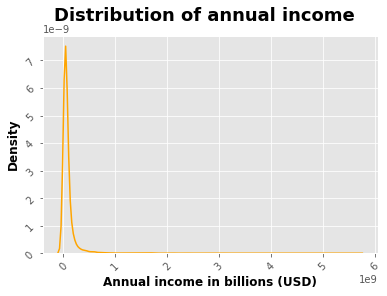

In [29]:
plt.style.use('ggplot')
plt.suptitle('Distribution of annual income', weight='bold', color = 'black').set_fontsize(18)
sns.distplot(my_dataset_lst['annual_income'], hist=False, kde=True, color = 'orange')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.xlabel('Annual income in billions (USD)', weight = 'bold', color = 'black')
plt.ylabel('Density', weight = 'bold', color = 'black')

The graph shows that the majority of annual income values in the dataset falls between 0 and 1 billion dollars.

In [30]:
top_ten = pd.read_sql(''' SELECT distinct t1.name, t1.annual_income FROM billionaire_list t1 
INNER JOIN ( SELECT name, MAX(time) AS max_time FROM billionaire_list GROUP BY name ) t2 
ON t1.name = t2.name AND t1.time = t2.max_time 
order by t1.annual_income desc limit  10 ;''', my_conn)
top_ten

,name,annual_income
0,Elon Musk,5650200000
1,Jeff Bezos,4411800000
2,Bernard Arnault,4076400000
3,Bill Gates,3328200000
4,Warren Buffett,3044400000
5,Larry Page,2863800000
6,Sergey Brin,2760600000
7,Larry Ellison,2734800000
8,Bertrand Puech,2631600000
9,Steve Ballmer,2358120000


In [ ]:
For top ten richest individuals, annual income is between 2.4 and 5.6 billion dollars. 

Text(0, 0.5, 'Density')

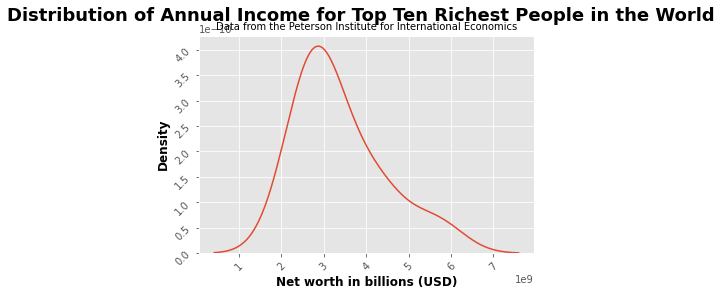

In [31]:
plt.suptitle('Distribution of Annual Income for Top Ten Richest People in the World', weight = 'bold', color = 'black').set_fontsize(18)
plt.title('Data from the Peterson Institute for International Economics', color = 'black').set_fontsize(10)
sns.distplot(top_ten['annual_income'], hist=False, kde=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.xlabel('Net worth in billions (USD)', weight = 'bold', color = 'black')
plt.ylabel('Density', weight = 'bold', color = 'black')

In [16]:
usa = pd.read_sql('''SELECT distinct t1.name, t1.annual_income, t1.main_industry
FROM billionaire_list t1 
INNER JOIN ( SELECT name, MAX(time) AS max_time FROM billionaire_list GROUP BY name ) t2 
ON t1.name = t2.name AND t1.time = t2.max_time 
where countries = 'usa'
order by t1.annual_income desc limit  10 ;  ''', my_conn)
usa

,name,annual_income,main_industry
0,Elon Musk,5650200000,Automotive
1,Jeff Bezos,4411800000,Technology
2,Bill Gates,3328200000,Technology
3,Warren Buffett,3044400000,Finance & Investments
4,Larry Page,2863800000,Technology
5,Sergey Brin,2760600000,Technology
6,Larry Ellison,2734800000,Technology
7,Steve Ballmer,2358120000,Technology
8,Michael Bloomberg,2115600000,Media & Entertainment
9,Mark Zuckerberg,1736340000,Technology


The predominant industry for high earners is the Technology sector. 

In [22]:
under_30 = pd.read_sql('''SELECT distinct t1.name, t1.annual_income, age, t1.main_industry
FROM billionaire_list t1 
INNER JOIN ( SELECT name, MAX(time) AS max_time FROM billionaire_list GROUP BY name ) t2 
ON t1.name = t2.name AND t1.time = t2.max_time 
where age<=30
order by t1.annual_income desc limit  10 ;  ''', my_conn)
under_30

,name,annual_income,age,main_industry
0,Sam Bankman-Fried,619200000,30,Finance & Investments
1,Wang Yayuan,309600000,30,Consumer Electronics
2,Gary Wang,152220000,28,Finance & Investments
3,Gustav Magnar Witzoe,116100000,28,Food & Beverage
4,Johnny Boufarhat,77400000,28,Technology Services
5,Kevin Guo,77400000,28,Cosmetics
6,Kevin David Lehmann,61920000,19,Fashion & Retail
7,Xu Ruotong,59339999,25,Auto Components
8,Alex Atallah,56760000,30,Technology
9,Jonathan Kwok,56760000,30,Real Estate


Text(0, 0.5, 'Top Earners income in Billions (USD)')

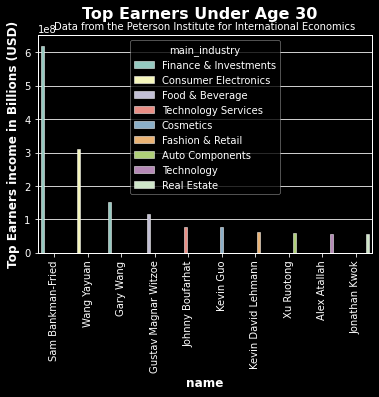

In [32]:
plt.style.use('dark_background')
plt.suptitle('Top Earners Under Age 30', weight = 'bold', color='white').set_fontsize(16)
plt.title('Data from the Peterson Institute for International Economics', color = 'white').set_fontsize(10)
plt.xticks(rotation=90)
sns.barplot('name', 'annual_income', 'main_industry', data = under_30, edgecolor='white')
plt.xlabel('name', weight = 'bold', color = 'white')
plt.ylabel('Top Earners'' income in Billions (USD)', weight = 'bold', color = 'white')

Top earners under 30 come from a diverse background of industries. 